In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

# Ejercicio 1

In [2]:
data=pd.read_csv("retrasos.csv")#Leemos el fichero csv y pasandolo a dataframe
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [3]:
data.ARR_DEL15[::3]

0         0.0
3         0.0
6         0.0
9         0.0
12        1.0
         ... 
583971    0.0
583974    1.0
583977    1.0
583980    0.0
583983    0.0
Name: ARR_DEL15, Length: 194662, dtype: float64

In [4]:
data.drop_duplicates(keep=False,inplace=True)#Eliminamos los datos duplicados
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [6]:
#Eliminamos las columnas repetidas o que no aporten ninguna informacion
data=data.drop(columns=['OP_CARRIER','CANCELLED','DIVERTED','Unnamed: 21'])

In [7]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['DAY_OF_MONTH'] >= 1) & (data['DAY_OF_MONTH'] <=7),
    (data['DAY_OF_MONTH'] >= 8) & (data['DAY_OF_MONTH'] <=14),
    (data['DAY_OF_MONTH'] >= 15) & (data['DAY_OF_MONTH'] <=22),
    (data['DAY_OF_MONTH'] <= 31)]
choicelist = ['Semana1', 'Semana2', 'Semana3','Semana4']
data['Etiqueta'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,Etiqueta
0,1,2,9E,20363,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,300.0,Semana1
1,1,2,9E,20363,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,596.0,Semana1
2,1,2,9E,20363,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,229.0,Semana1
3,1,2,9E,20363,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,223.0,Semana1
4,1,2,9E,20363,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,579.0,Semana1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,N776UA,200,12016,1201602,GUM,12173,1217305,HNL,749.0,0.0,0700-0759,1832.0,0.0,3801.0,Semana4
583981,31,4,UA,19977,N36280,174,12016,1201602,GUM,14955,1495503,SPN,717.0,0.0,0700-0759,759.0,0.0,129.0,Semana4
583982,31,4,UA,19977,N36280,117,14955,1495503,SPN,12016,1201602,GUM,857.0,0.0,0900-0959,933.0,0.0,129.0,Semana4
583983,31,4,UA,19977,N39726,105,14955,1495503,SPN,12016,1201602,GUM,1820.0,0.0,1800-1859,1854.0,0.0,129.0,Semana4


In [8]:
#Teniendo en cuenta que la columna DEP_DEL15 indica con un 1 que se ha producido un retraso y con un 0 que no se ha producido ninguno
#Si sumamos la columna DEP_DEL15 segun etiquieta podemos ver la cantidad de vuelos retrasados segun la semana
enero=data.groupby(['Etiqueta'])['DEP_DEL15'].sum()

# Ejercicio 2

<AxesSubplot:xlabel='Etiqueta'>

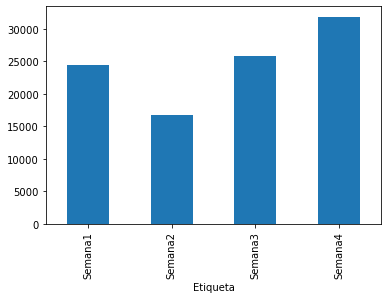

In [9]:
enero.plot(kind='bar')

# Ejercicio 3

In [10]:
#Sumamos la columna DEP_DEL15 segun la compañia y el origen
#Sumando esta columna obtenemos el numero de veces que la compañia ha tenido retrasos segun el origen
ej3= data.groupby(['OP_CARRIER_AIRLINE_ID', 'ORIGIN']).agg(SUM=('DEP_DEL15', 'sum'))
ej31=pd.DataFrame(ej3)
#5 compañías con mas problemas con respecto al aeropuerto de origen
var=ej31.nlargest(5, 'SUM')
var

,,SUM
OP_CARRIER_AIRLINE_ID,ORIGIN,
19805,DFW,2278.0
19790,ATL,2200.0
19393,MDW,1662.0
20304,ORD,1476.0
19805,ORD,1462.0


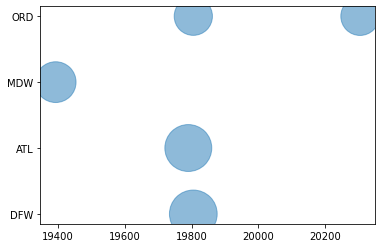

In [11]:
#Reseteamos el index para poder escoger las columnas
var1=var.reset_index()

#el eje de las X indica la compañía (OP_CARRIER_AIRLINE_IDF)
x = var1['OP_CARRIER_AIRLINE_ID']
#el eje Y el aeropuerto de origen (ORIGIN)
y = var1['ORIGIN']
#eje z es el numero de retrasos
z = var1['SUM']
 
# Bubble plot
plt.scatter(x, y, s=z, alpha=0.5)
plt.show()


# Ejercicio 3

In [12]:
#Sumamos la columna ARR_DEL15 segun el aeropuerto de destino
#Sumando esta columna obtenemos el numero de veces que el aeropuerto de destino ha tenido retrasos
retrasos_destino= data.groupby(['DEST_AIRPORT_ID']).agg(SUM=('ARR_DEL15', 'sum'))
retrasos_destino=pd.DataFrame(retrasos_destino)
#5 aeropuertos con mas retrasos
var_destino=retrasos_destino.nlargest(5, 'SUM')
var_destino

,SUM
DEST_AIRPORT_ID,
13930,6441.0
12953,4836.0
11298,4282.0
10397,3931.0
14771,3642.0


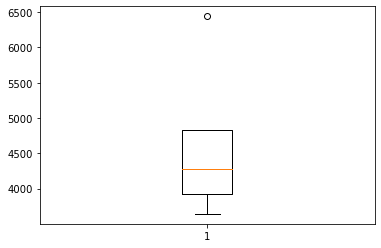

In [13]:
#Usa los diagramas de cajas donde cada uno de los 5 aeropuertos de destino con mas retrasos.
x=var_destino['SUM']
plt.boxplot(x)
plt.show()

Podemos ver que la mayoria de los retrasos segun el aeropuerto de destino se encuentra entre los 4000 y 5000 retrasos, con una excepcion que se encuentra en los 6400, la media se encuentra entre los 4500 y los 4000

# Ejercicio 4 

39590
230597
9846


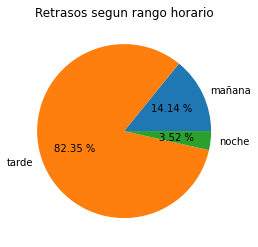

In [30]:
mañana=data[(data['DEP_TIME']>=800) & (data['DEP_TIME']<=1500) & (data['ARR_DEL15']==1)].count()[16]
tarde=data[(data['DEP_TIME']>1500) & (data['DEP_TIME']<=2359) | (data['DEP_TIME']==0000)& (data['ARR_DEL15']==1)].count()[16]
noche=data[(data['DEP_TIME']>0000) & (data['DEP_TIME']<800)& (data['ARR_DEL15']==1)].count()[16]
print(mañana)
print(tarde)
print(noche)
labels=['mañana','tarde','noche']
plt.pie([mañana,tarde,noche],labels=labels,autopct='%.2f %%')
plt.title('Retrasos segun rango horario')
plt.show()

Hemos usado un diagrama de quesos para representar la diferencia entre los tres rangos horarios.
Como se puede observar existen muchos mas retrasos por la tarde que en cualquier otro rango horario, este rango contiene un 82,35% de los retrasos.
En segundo puesto de los retrasos seria el rango horario de la mañana que contiene un 14,14%.
En ultimo puesto esta el rango de la noche que contiene un 3,52%.